# Basic RNA Folding with Vienna

This notebook demonstrates the basic usage of the Vienna package for RNA secondary structure prediction.


In [1]:
import vienna
import matplotlib.pyplot as plt
import numpy as np

## Simple Folding

Let's start with a simple RNA sequence:


In [2]:
# Simple hairpin sequence
sequence = "GGGGAAAACCCC"

# Fold the sequence
result = vienna.fold(sequence)

print(f"Sequence: {sequence}")
print(f"Structure: {result.dot_bracket}")
print(f"Minimum Free Energy: {result.mfe} kcal/mol")
print(f"Ensemble Diversity: {result.ens_defect}")

Sequence: GGGGAAAACCCC
Structure: ((((....))))
Minimum Free Energy: -5.400000095367432 kcal/mol
Ensemble Diversity: 1.6237946587049388


## Visualizing the Structure

Let's visualize the structure in a simple way:


In [3]:
def visualize_structure(sequence, structure):
    """Simple visualization of RNA structure"""
    print("Sequence:", sequence)
    print("Structure:", structure)
    print("\nBase pairing:")

    # Find base pairs
    pairs = []
    stack = []
    for i, char in enumerate(structure):
        if char == "(":
            stack.append(i)
        elif char == ")":
            if stack:
                pairs.append((stack.pop(), i))

    for i, j in pairs:
        print(f"  {sequence[i]} ({i+1}) pairs with {sequence[j]} ({j+1})")


visualize_structure(sequence, result.dot_bracket)

Sequence: GGGGAAAACCCC
Structure: ((((....))))

Base pairing:
  G (4) pairs with C (9)
  G (3) pairs with C (10)
  G (2) pairs with C (11)
  G (1) pairs with C (12)


## Folding Multiple Sequences

Let's compare folding of different sequences:


In [4]:
# Test different sequences
sequences = [
    "GGGGAAAACCCC",  # Simple hairpin
    "AUGCGUACGUACGUACGUA",  # Random sequence
    "GGGGAAAACCCC" * 2,  # Longer hairpin
]

for seq in sequences:
    result = vienna.fold(seq)
    print(f"\nSequence: {seq[:30]}..." if len(seq) > 30 else f"\nSequence: {seq}")
    print(
        f"  Structure: {result.dot_bracket[:50]}..."
        if len(result.dot_bracket) > 50
        else f"  Structure: {result.dot_bracket}"
    )
    print(f"  Energy: {result.mfe:.2f} kcal/mol")
    print(f"  Ensemble Diversity: {result.ens_defect:.2f}")


Sequence: GGGGAAAACCCC
  Structure: ((((....))))
  Energy: -5.40 kcal/mol
  Ensemble Diversity: 1.62

Sequence: AUGCGUACGUACGUACGUA
  Structure: .(((((((....)))))))
  Energy: -7.30 kcal/mol
  Ensemble Diversity: 0.52

Sequence: GGGGAAAACCCCGGGGAAAACCCC
  Structure: ((((....))))((((....))))
  Energy: -12.80 kcal/mol
  Ensemble Diversity: 1.83


## Energy Comparison

Compare folding energies for different sequence lengths:


Length 10: Energy = -0.40 kcal/mol
Length 20: Energy = -7.10 kcal/mol
Length 30: Energy = -18.80 kcal/mol
Length 40: Energy = -27.00 kcal/mol
Length 50: Energy = -33.90 kcal/mol


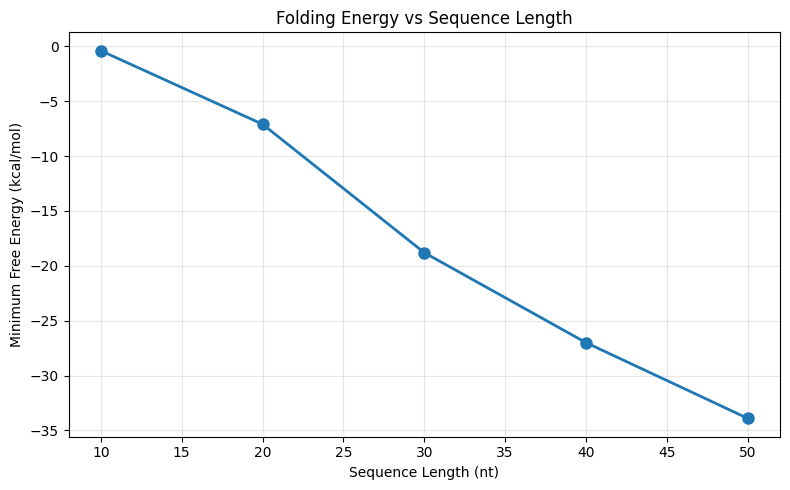

In [5]:
# Generate sequences of different lengths
lengths = [10, 20, 30, 40, 50]
energies = []

for length in lengths:
    # Create a simple repeating sequence
    seq = "GGGGAAAACCCC" * (length // 12 + 1)
    seq = seq[:length]

    result = vienna.fold(seq)
    energies.append(result.mfe)
    print(f"Length {length:2d}: Energy = {result.mfe:.2f} kcal/mol")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lengths, energies, "o-", linewidth=2, markersize=8)
plt.xlabel("Sequence Length (nt)")
plt.ylabel("Minimum Free Energy (kcal/mol)")
plt.title("Folding Energy vs Sequence Length")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()